# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:https://www.kaggle.com/datasets/hbugrae/best-selling-steam-games-of-all-time

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("bestSelling_games.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#mengubah kolom tanggal
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [4]:
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2380 non-null   object        
 1   reviews_like_rate    2380 non-null   int64         
 2   all_reviews_number   2380 non-null   int64         
 3   release_date         2380 non-null   datetime64[ns]
 4   developer            2380 non-null   object        
 5   user_defined_tags    2380 non-null   object        
 6   supported_os         2380 non-null   object        
 7   supported_languages  2380 non-null   object        
 8   price                2380 non-null   float64       
 9   other_features       2380 non-null   object        
 10  age_restriction      2380 non-null   int64         
 11  rating               2380 non-null   float64       
 12  difficulty           2380 non-null   int64         
 13  length               2380 non-nul

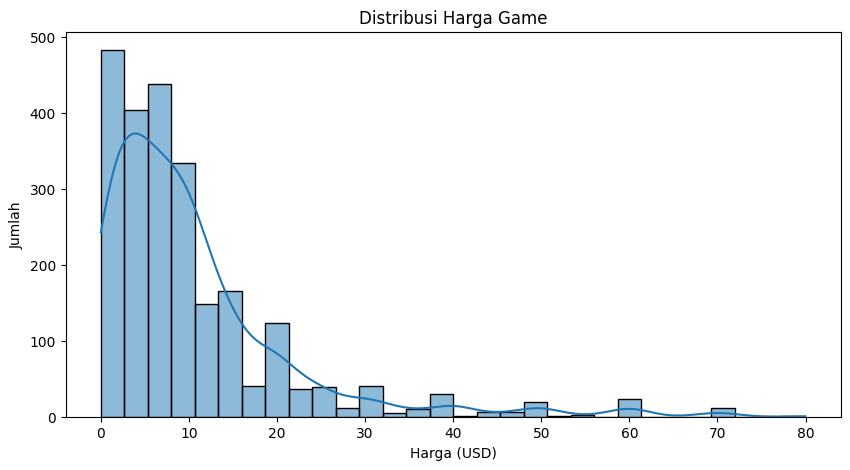

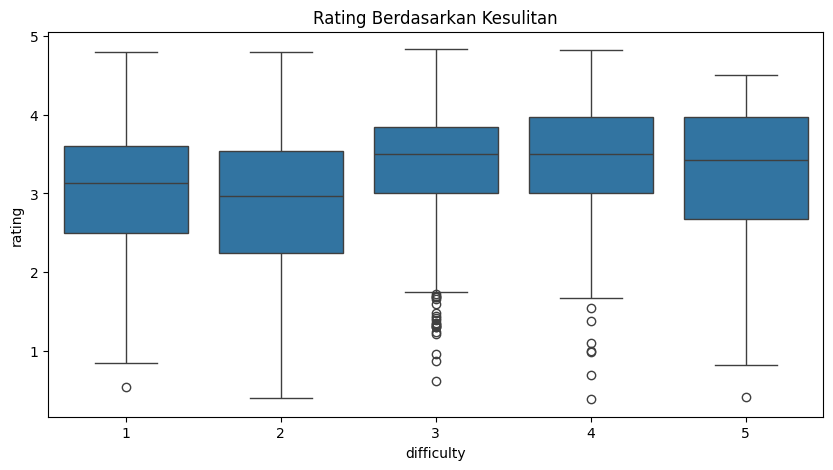

In [6]:
# Visualisasi sederhana
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Game')
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='difficulty', y='rating', data=df)
plt.title('Rating Berdasarkan Kesulitan')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
#menghapus kolom yang tidak digunakan
df_clean = df.drop(columns=['user_defined_tags', 'other_features', 'supported_languages'])

In [8]:
## Encode kolom kategorikal
label_cols = ['developer', 'supported_os']
le = LabelEncoder()
for col in label_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [9]:
#menyimpan hasil preprocessing
output_dir = 'bestSelling_games_preprocessing'
os.makedirs(output_dir, exist_ok=True)
df_clean.to_csv(f'{output_dir}/bestSelling_games_clean.csv', index=False)

print("Preprocessing selesai. File disimpan di:", output_dir)

Preprocessing selesai. File disimpan di: bestSelling_games_preprocessing
